### Digit Classification of MNIST dataset after dimensionality reduction from 784 to 32 using Auto-Encoders

##### Validation Accuracy ~ 84%

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import theano
from keras.models import Sequential,Model,load_model
from keras.layers import Dense,Activation,Dropout
from keras.utils import np_utils

Using Theano backend.


In [2]:
x = pd.read_csv('./train.csv')
X = np.array(x)
x = X[:,1:]
y = X[:,0]
print x.shape,y.shape
X = x.reshape((X.shape[0], 1, 28, 28))
print X.shape

(42000, 784) (42000,)
(42000, 1, 28, 28)


In [3]:
encoder = load_model('./enc_32d.h5')
X_enc = encoder.predict(X)
print X_enc.shape

/usr/local/lib/python2.7/dist-packages/keras/models.py:136: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


(42000, 32)


In [4]:
X_enc = (X_enc - X_enc.mean()/X_enc.std())

In [5]:
x_train = X_enc[:30000,:]
x_crossval = X_enc[30000:,:]
y = np_utils.to_categorical(y)
y_train = y[:30000]
y_crossval = y[30000:]
print x_train.shape,x_crossval.shape,y_train.shape,y_crossval.shape

(30000, 32) (12000, 32) (30000, 10) (12000, 10)


In [6]:
model = Sequential()

model.add(Dense(16, input_dim=32))
model.add(Activation('relu'))
model.add(Dropout(0.35))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 16)            528         dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 16)            0           dense_1[0][0]                    
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 16)            0           activation_1[0][0]               
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 10)            170         dropout_1[0][0]                  
___________________________________________________________________________________________

In [7]:
hist = model.fit(x_train,y_train,
                 nb_epoch = 100,
                 shuffle = True,
                 batch_size = 256,
                 validation_data=(x_crossval, y_crossval))

Train on 30000 samples, validate on 12000 samples
Epoch 1/100
30000/30000 [==============================] - 0s - loss: 13.6989 - acc: 0.1448 - val_loss: 12.4699 - val_acc: 0.2165
Epoch 2/100
30000/30000 [==============================] - 0s - loss: 12.4212 - acc: 0.2200 - val_loss: 11.3825 - val_acc: 0.2890
Epoch 3/100
30000/30000 [==============================] - 0s - loss: 11.2874 - acc: 0.2833 - val_loss: 9.2895 - val_acc: 0.4066
Epoch 4/100
30000/30000 [==============================] - 0s - loss: 9.1827 - acc: 0.3434 - val_loss: 4.9138 - val_acc: 0.3538
Epoch 5/100
30000/30000 [==============================] - 0s - loss: 2.5094 - acc: 0.1851 - val_loss: 2.2575 - val_acc: 0.2097
Epoch 6/100
30000/30000 [==============================] - 0s - loss: 2.2445 - acc: 0.1745 - val_loss: 2.1650 - val_acc: 0.2151
Epoch 7/100
30000/30000 [==============================] - 0s - loss: 2.2106 - acc: 0.1823 - val_loss: 2.1262 - val_acc: 0.2327
Epoch 8/100
30000/30000 [========================

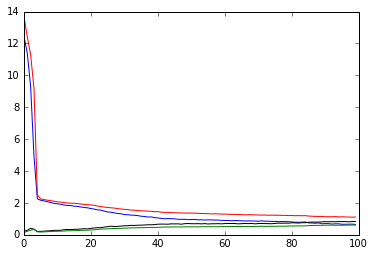

In [8]:
plt.plot(hist.history['val_loss'], color ='b')
plt.plot(hist.history['loss'], color='r')
plt.plot(hist.history['val_acc'], color ='black')
plt.plot(hist.history['acc'], color ='g')
plt.show()